# COVID-19

*Print the names of the 8 countries with highest corona patients in the fourth month of 2020. \
*Plot the death rate in Iran on different days.

Run the following command to install the required libraries:
```
pip install -r requirements.txt

```

import Libraries :

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1-Read the file and display its head.

In [7]:
data = pd.read_csv("COVID-19.csv")
data.head(1)

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert a date from a string format to an actual date. \
Information processing and extracting data for April 2020 from the dataset.

In [15]:
data["Date"] = pd.to_datetime(data["Date"])  
april_2020 = data[(data['Date'].dt.year == 2020) & (data['Date'].dt.month == 4)]
april_2020.head()


,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
13510,13510,2020-04-01,Afghanistan,197.0,4.0,5.0,188.0,22.0,0.0,0.0,202004.0
13511,13511,2020-04-01,Albania,259.0,15.0,67.0,177.0,16.0,0.0,15.0,202004.0
13512,13512,2020-04-01,Algeria,847.0,58.0,61.0,728.0,131.0,14.0,15.0,202004.0
13513,13513,2020-04-01,Andorra,390.0,14.0,10.0,366.0,14.0,2.0,0.0,202004.0
13514,13514,2020-04-01,Angola,8.0,2.0,1.0,5.0,1.0,0.0,0.0,202004.0


In [26]:
active_by_country = april_2020.groupby('CountryRegion')['Active'].sum()
top_8_countries = active_by_country.sort_values(ascending=False).head(8)
top_8_countries.astype(int)

CountryRegion
US                17142781
Italy              3017835
United Kingdom     2856248
Spain              2621463
France             2028962
Turkey             1671945
Germany            1636325
Russia             1023297
Name: Active, dtype: int32

Plot the death rate in Iran on different days:

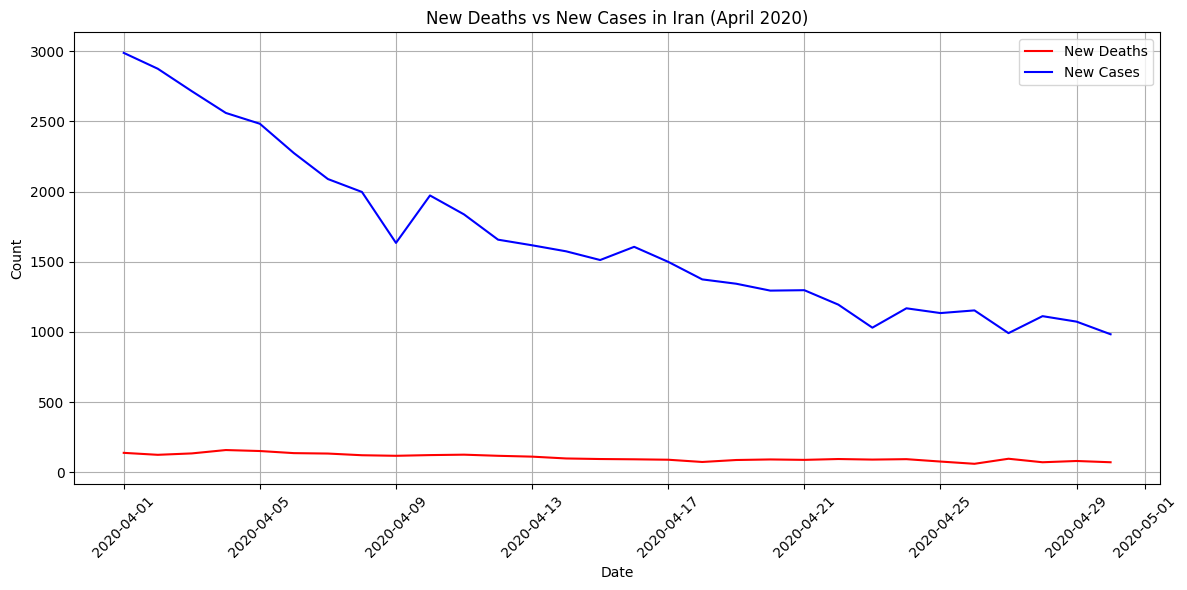

In [28]:

iran_april_2020 = april_2020[(april_2020['CountryRegion'] == 'Iran')]

plt.figure(figsize=(12, 6))
plt.plot(iran_april_2020['Date'], iran_april_2020['New deaths'], label='New Deaths', color='red')
plt.plot(iran_april_2020['Date'], iran_april_2020['New cases'], label='New Cases', color='blue')

plt.title('New Deaths vs New Cases in Iran (April 2020)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()
